### TP0: Introducción al Análisis de Datos

**Ejecutar inicialmente el siguiente código**


In [1]:
from src.catching import attempt_catch
from src.pokemon import PokemonFactory, StatusEffect

import json
from functools import reduce
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

factory = PokemonFactory("pokemon.json")

with open("pokemon.json", "r") as c:
    pokemons = json.load(c)
    pokemon_names = pokemons.keys()

with open("pokeballs.json", "r") as c:
    pokeballs = json.load(c)

with open("config.json", "r") as c:
    config = json.load(c)
    
def create_pokemon_pokeball_matrix(tries, level = 100, status_effect = StatusEffect.NONE, health_points = 1):
    pokemon_pokeball_matrix = {} 

    for name in pokemon_names:
        pokemon_pokeball_matrix[name] = {}
        pokemon = factory.create(name, level, status_effect, health_points)
        for ball in pokeballs:
            pokemon_pokeball_matrix[name][ball] = 0
            for _ in range(tries):
                pokemon_pokeball_matrix[name][ball] += attempt_catch(pokemon, ball)[0]
    return pokemon_pokeball_matrix

def create_pokemon_status_matrix(tries, level = 100, ball = 'pokeball', health_points = 1, names = pokemon_names):
    pokemon_status_matrix = {} 

    for name in names: 
        pokemon_status_matrix[name] = {}
        for status_effect in StatusEffect:
            pokemon = factory.create(name, level, status_effect, health_points)
            pokemon_status_matrix[name][status_effect] = 0
            for _ in range(tries):
                pokemon_status_matrix[name][status_effect] += attempt_catch(pokemon, ball)[0]
    return pokemon_status_matrix
    
def create_pokemon_health_matrix(tries, level = 100, ball = 'pokeball', status_effect = StatusEffect.NONE, names = pokemon_names):
    pokemon_status_matrix = {} 

    for name in names:
        pokemon_status_matrix[name] = {}
        for health in [x / 100.0 for x in range(1, 100)]:
            pokemon = factory.create(name, level, status_effect, health)
            pokemon_status_matrix[name][health] = 0
            for _ in range(tries):
                pokemon_status_matrix[name][health] += attempt_catch(pokemon, ball)[0]
    return pokemon_status_matrix

def create_pokemon_level_matrix(tries, ball = 'pokeball', status_effect = StatusEffect.NONE, names = pokemon_names, health_points = 1):
    pokemon_status_matrix = {} 

    for name in names:
        pokemon_status_matrix[name] = {}
        for level in range(1, 100):
            pokemon = factory.create(name, level, status_effect, health_points)
            pokemon_status_matrix[name][level] = 0
            for _ in range(tries):
                pokemon_status_matrix[name][level] += attempt_catch(pokemon, ball)[0]
    return pokemon_status_matrix

### Ejercicio 1: Acerca de las pokebolas
**a) Ejecutando la función 100 veces, para cada Pokemon en condiciones ideales (HP:100 %, LVL 100) ¿Cuál es la probabilidad de captura promedio para cada pokebola?**

In [2]:
TRIES = config["ejercicio1a"]["tries"]
pokeball_stats = {}
pokemon_pokeball_matrix = create_pokemon_pokeball_matrix(tries=TRIES)
df = pd.DataFrame(pokemon_pokeball_matrix).transpose()

for ball in pokeballs:
    pokeball_stats[ball] = f"{df[ball].sum() / len(pokemon_names):.2f}%"

catch_rate_df = pd.DataFrame(pokeball_stats, index=["Catch Rate"])
catch_rate_df

,pokeball,ultraball,fastball,heavyball
Catch Rate,10.20%,24.00%,15.20%,11.40%


En la tabla anterior se pueden observar las probabilidades de captura promedio de cada pokebola ejecutando 100 veces la función para cada pokemon.

<Axes: title={'center': 'Catch rate of pokeballs'}, xlabel='Pokeball'>

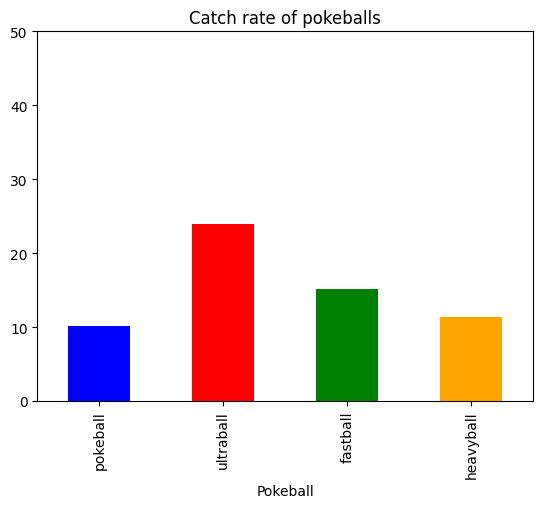

In [3]:
cdft = catch_rate_df.applymap(lambda x: float(x[:-1])).transpose()
cdft.reset_index(inplace=True)
cdft.columns = ["Pokeball", "Catch Rate"]

cdft.plot.bar(
    x="Pokeball",
    y="Catch Rate",
    ylim=(0, 50),
    title="Catch rate of pokeballs",
    legend=False,
    color=['blue', 'red', 'green', 'orange'],
)

En el gráfico anterior, se puede observar que la pokeball y la heavyball tienen un promedio de captura similar, mientras que para la ultraball crece a más del doble. Se podría suponer que esto se debe a que el único pokemon pesado presente en la muestra es Snorlax.

**b) ¿Es cierto que algunas pokebolas son más o menos efectivas dependiendo de propiedades intrínsecas de cada Pokemon?**

In [4]:
TRIES = config["ejercicio1b"]["tries"]

pokemon_pokeball_matrix = create_pokemon_pokeball_matrix(tries=TRIES)


df = pd.DataFrame(pokemon_pokeball_matrix)
original_df = df.copy()
df = df.applymap(lambda x: x / TRIES)
jolteon_stats_df = df["jolteon"].copy().map(lambda x: x/df["jolteon"]["pokeball"]).to_frame()
jolteon_stats_df

,jolteon
pokeball,1.000000
ultraball,2.206349
fastball,4.015873
heavyball,0.539683


In [5]:
snorlax_stats_df = df["snorlax"].copy().map(lambda x: x/df["snorlax"]["pokeball"]).to_frame()
snorlax_stats_df

,snorlax
pokeball,1.000000
ultraball,1.631579
fastball,1.026316
heavyball,2.184211


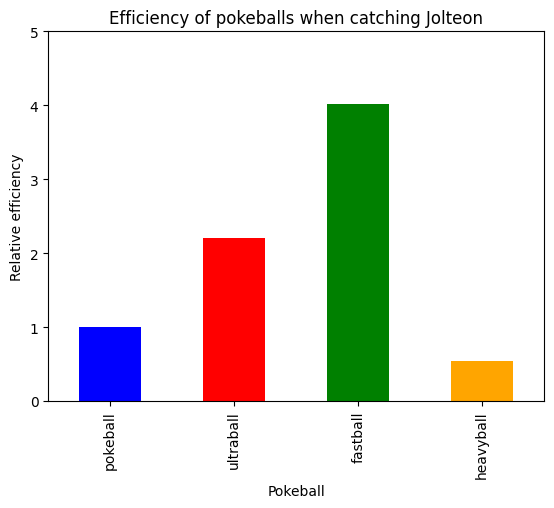

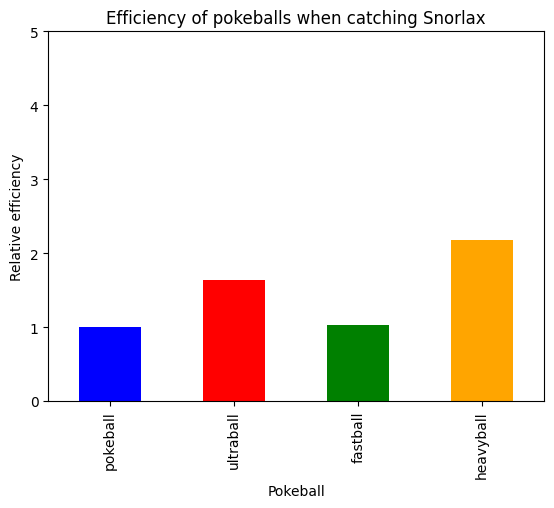

In [6]:
jolteon_stats_df.reset_index(inplace=True)
jolteon_stats_df.columns = ["Pokeball", "Efficiency"]
jolteon_stats_df.plot.bar(x="Pokeball", y="Efficiency", 
                          ylim=(0, 5),
                          title="Efficiency of pokeballs when catching Jolteon",
                          ylabel="Relative efficiency",
                          color=['blue', 'red', 'green', 'orange'],
                          legend=False)

snorlax_stats_df.reset_index(inplace=True)
snorlax_stats_df.columns = ["Pokeball", "Efficiency"]
snorlax_stats_df.plot.bar(x="Pokeball", y="Efficiency", 
                          ylim=(0, 5),
                          title="Efficiency of pokeballs when catching Snorlax",
                          ylabel="Relative efficiency",
                          color=['blue', 'red', 'green', 'orange'],
                          legend=False)
plt.show()

En el gráfico anterior se puede observar que algunas pokebolas son más o menos efectivas dependiendo de las propiedades de cada pokemon. 

Usando como referencia la pokebola (efectividad = 1) se puede concluir que la heavyball tiene una efectividad muy baja para el pokemon Jolteon, mientras que en Snorlax tiene una efectividad ampliamente superior al resto. Esto puede deberse a que Jolteon es liviano, mientras que Snorlax es más pesado.

En la fastball se puede observar un comportamiento inverso a la heavyball, siendo mas efectiva en los pokemones más livianos y baja en los pesados.

En la ultraball no se detectan variaciones significantes en la efectividad.

### Ejercicio 2: Acerca del estado del Pokemon

**a) ¿Las condiciones de salud tienen algun efecto sobre la efectividad de la captura? Si es así, ¿Cuál es más o menos efectiva?**


<Axes: title={'center': 'Average and standard deviation of status effects'}>

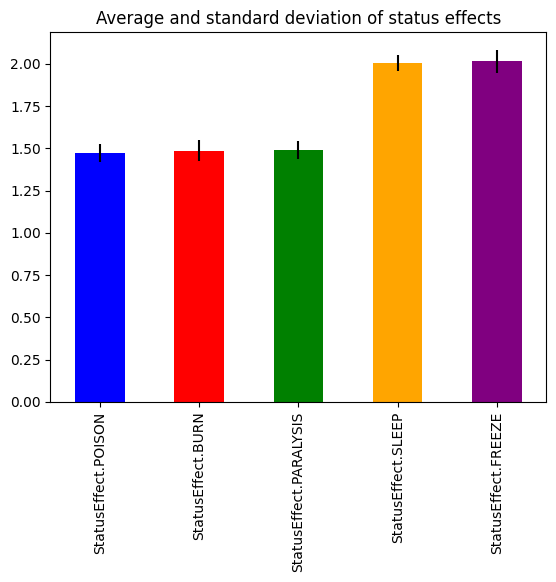

In [7]:
TRIES = config["ejercicio2a"]["tries"]

pokemon_status_matrix = create_pokemon_status_matrix(tries=TRIES)

df = pd.DataFrame(pokemon_status_matrix)
odf = df.copy()

df = df.apply(lambda x: x / x[-1])

status_effect_stats = df.mean(axis=1).to_frame()
status_effect_stats.columns = ["Average"]
status_effect_stats["Standard Deviation"] = df.std(axis=1)
status_effect_stats = status_effect_stats[:-1]
status_effect_stats.plot.bar(y="Average", 
                            yerr="Standard Deviation",
                            title="Average and standard deviation of status effects",
                            color=['blue', 'red', 'green', 'orange', 'purple'],
                            legend=False)

Se puede decir que las condiciones de salud tienen efecto sobre la efectividad de captura.

Se logra observar (teniendo en cuenta el desvío estándar) que los estados de SLEEP y FREEZE aumentan ampliamente la efectividad de manera similar con respecto a la del resto.

Las otras tres en menor medida, también afectan la efectividad de captura positivamente.

**b) ¿Cómo afectan los puntos de vida a la efectividad de la captura?**

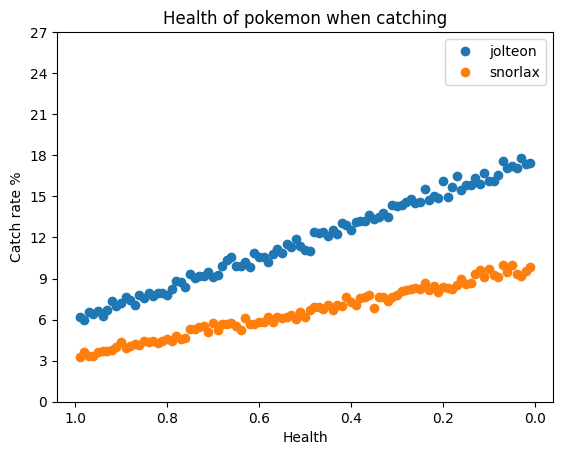

In [8]:
TRIES = config["ejercicio2b"]["tries"]

pokemon_health_matrix = create_pokemon_health_matrix(tries=TRIES, names=["jolteon", "snorlax"])

df = pd.DataFrame(pokemon_health_matrix)
df = df.apply(lambda x: 100 * x / TRIES)

df.plot(title="Health of pokemon when catching",
        yticks=[i for i in range(0, 30, 3)],  # Set y-axis ticks from 0 to 100 by 10
        ylabel="Catch rate %",
        xlabel="Health",
        style=['o', 'o'],
        legend=["Jolteon", "Snorlax"])

plt.gca().invert_xaxis()

plt.show()

Los puntos de vida parecen estar relacionados linealmente con la tasa de captura. Al disminuir la vida del pokemon aumenta la tasa de captura.

El gráfico mantiene constante todos los parametros en condición ideal (nivel máximo, sin status effect y pokeball), salvo por la vida.

Se puede destacar que la diferencia entre ambos pokemones se debe a propiedades intrínsecas de cada uno de ellos.

**c) ¿Qué parámetros son los que más afectan la probabilidad de captura?**

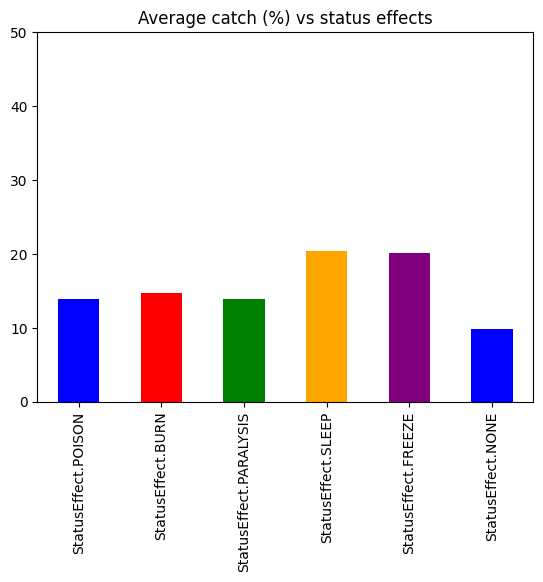

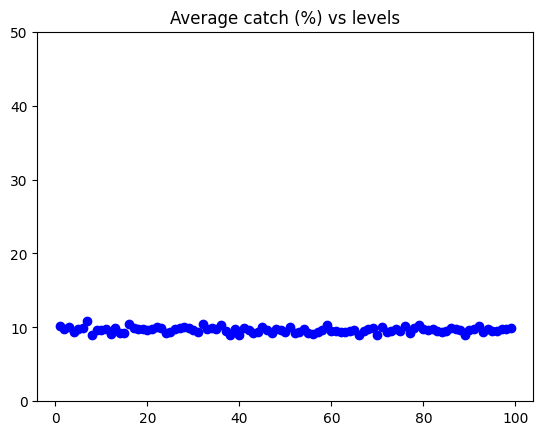

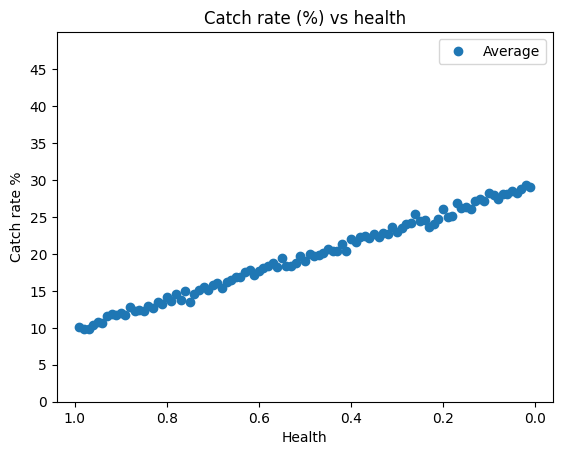

In [9]:
TRIES = config["ejercicio2c"]["tries"]

pokemon_status_matrix = create_pokemon_status_matrix(tries=TRIES)

df = pd.DataFrame(pokemon_status_matrix)
df = df.apply(lambda x: 100 * x / TRIES)

mf = df.mean(axis=1).to_frame()
mf.columns = ["Average"]

mf.plot.bar(y="Average", 
            ylim=(0, 50),
            title="Average catch (%) vs status effects",
            color=['blue', 'red', 'green', 'orange', 'purple'],
            legend=False)

pokemon_level_matrix = create_pokemon_level_matrix(tries=TRIES)

df = pd.DataFrame(pokemon_level_matrix)
df = df.apply(lambda x: 100 * x / TRIES)

mf = df.mean(axis=1).to_frame()
mf.columns = ["Average"]

mf.plot(y="Average", 
            ylim=(0, 50),
            title="Average catch (%) vs levels",
            color=['blue', 'red', 'green', 'orange', 'purple'],
            style=['o'],
            legend=False)


pokemon_health_matrix = create_pokemon_health_matrix(tries=TRIES)

df = pd.DataFrame(pokemon_health_matrix)
df = df.apply(lambda x: 100 * x / TRIES)
df = df.mean(axis=1).to_frame()
df.columns = ["Average"]

df.plot(title="Catch rate (%) vs health",
        yticks=[i for i in range(0, 50, 5)],  # Set y-axis ticks from 0 to 100 by 10
        ylabel="Catch rate %",
        ylim=(0, 50),
        xlabel="Health",
        style=['o'])

plt.gca().invert_xaxis()


plt.show()

De los cuatro parametros se puede analizar lo siguiente:

1. Pokeball:
Utilizando el gráfico del ejercicio 1a se puede observar que la tasa de captura, variando la pokeball y manteniendo todo el resto de los parámetros constantes y con sus valores estándar (máxima salud y nivel, status effect NONE), está aproximadamente entre 10% y 20%.

2. Status Effect:
El estado del pokemon siempre afecta a la probabilidad de captura (en comparación al pokemon con status effect NONE). Al igual que la pokeball, como máximo, el status effect puede alcanzar un valor que es igual al doble del valor de referencia.

3. Level:
Como se observa en el gráfico, el nivel no afecta la tasa de captura (es constante)

4. Health:
La vida como siempre afecta el porcentaje de captura. De hecho, el máximo efecto (entre 1 y 0) es casi el triple.

Se puede concluir que la vida es el parámetro que más afecta la captura de un pokemon.

**d) Teniendo en cuenta uno o dos pokemones distintos: ¿Qué combinación de condiciones (propiedades mutables) y pokebola conviene utilizar para capturarlos?**

In [10]:
TRIES = config["ejercicio2d"]["tries"]

jolteon_matrix = create_pokemon_status_matrix(tries=TRIES, names=['jolteon'], health_points=0.5, ball='fastball')
df_jolteon = pd.DataFrame([jolteon_matrix['jolteon']]).apply(lambda x: 100 * x / TRIES).transpose()
df_jolteon.columns = ["Catch rate"]
df_jolteon

,Catch rate
StatusEffect.POISON,69.85
StatusEffect.BURN,70.10
StatusEffect.PARALYSIS,70.95
StatusEffect.SLEEP,94.09
StatusEffect.FREEZE,94.28
StatusEffect.NONE,47.24


Como se observa en el grafico del ejercicio 1b, la pokeball más efectiva para Jolteon es la fastball.
Utilizando 0.5 de vida (algo realista dentro del juego) se genera la tabla para analizar qué status effect es más efectivo para Jolteon.

Se recomienda usar (para maximizar la tasa de captura) SLEEP o FREEZE. De todas maneras, incluso en caso de no contar con los status effects SLEEP y FREEZE, es evidente que el uso de status effects aumenta mucho la probabilidad de captura en general.

In [11]:
TRIES = 10_000

snorlax_matrix = create_pokemon_status_matrix(tries=TRIES, names=['snorlax'], health_points=0.5, ball='heavyball')
df_snorlax = pd.DataFrame([snorlax_matrix['snorlax']]).apply(lambda x: 100 * x / TRIES).transpose()
df_snorlax.columns = ["Catch rate"]
df_snorlax

,Catch rate
StatusEffect.POISON,25.63
StatusEffect.BURN,25.35
StatusEffect.PARALYSIS,24.91
StatusEffect.SLEEP,33.55
StatusEffect.FREEZE,33.59
StatusEffect.NONE,17.11


Como se observa en el gráfico del ejercicio 1b, la pokeball más efectiva para Snorlax es la heavyball.
Utilizando 0.5 de vida, se genera la tabla anterior.

Al igual que para el pokemon Jolteon, se recomienda usar SLEEP o FREEZE para maximizar la tasa de captura. El uso de status effects aumenta la probabilidad de captura de Snorlax. Sin embargo, las chances no aumentan tanto como ocurre con Jolteon. De esta manera, se puede ver que Snorlax es más difícil de capturar que Jolteon.



**e) A partir del punto anterior, ¿sería efectiva otra combinación de parametros teniendo en cuenta un nivel del pokemon más bajo (o más alto)?**

In [12]:
TRIES = config["ejercicio2e"]["tries"]

jolteon_matrix = create_pokemon_level_matrix(tries=TRIES, names=['jolteon'], health_points=0.5, ball='fastball', status_effect=StatusEffect.SLEEP)
df_jolteon = pd.DataFrame([jolteon_matrix['jolteon']]).apply(lambda x: 100 * x / TRIES).transpose()
df_jolteon.columns = ["Catch rate"]
df_jolteon.std()

Catch rate    0.805324
dtype: float64

Se observa que para Jolteon, el desvio estandar de la tasa de captura en relacion al nivel es casi insignificante (0.75%)

In [13]:
TRIES = config["ejercicio2e"]["tries"]

snorlax_matrix = create_pokemon_level_matrix(tries=TRIES, names=['snorlax'], health_points=0.5, ball='heavyball', status_effect=StatusEffect.SLEEP)
df_snorlax = pd.DataFrame([snorlax_matrix['snorlax']]).apply(lambda x: 100 * x / TRIES).transpose()
df_snorlax.columns = ["Catch rate"]
df_snorlax.std()

Catch rate    0.484203
dtype: float64

Al igual que para Jolteon, para Snorlax el desvío estándar de la tasa de captura en relación al nivel es casi insignificante (0.75%)

Por lo tanto, parecería que, sin importar el nivel nivel, la tasa de captura es la misma. Se puede atribuir el desvio estandar a la aleatoridad de las capturas.